In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
# load in packages
from itertools import combinations

##from test_results import valid_results, test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [65]:
data = pd.read_csv("Email_marketing_campaign.csv")
print(data.head(10))

print(data['visit'].value_counts())

   recency history_segment  history  mens  womens   zip_code  newbie channel  \
0       10  2) $100 - $200   142.44     1       0  Surburban       0   Phone   
1        6  3) $200 - $350   329.08     1       1      Rural       1     Web   
2        7  2) $100 - $200   180.65     0       1  Surburban       1     Web   
3        9  5) $500 - $750   675.83     1       0      Rural       1     Web   
4        2    1) $0 - $100    45.34     1       0      Urban       0     Web   
5        6  2) $100 - $200   134.83     0       1  Surburban       0   Phone   
6        9  3) $200 - $350   280.20     1       0  Surburban       1   Phone   
7        9    1) $0 - $100    46.42     0       1      Urban       0   Phone   
8        9  5) $500 - $750   675.07     1       1      Rural       1   Phone   
9       10    1) $0 - $100    32.84     0       1      Urban       1     Web   

         segment  visit  conversion  spend  
0  Womens E-Mail      0           0    0.0  
1      No E-Mail      0      

In [74]:
group_zip = data.groupby(["zip_code","visit"]).agg(np.sum).reset_index()

    zip_code  visit  recency     history   mens  womens  newbie  conversion  \
0      Rural      0    45394  1846119.48   4254    4162    3979           0   
1      Rural      1     9404   476292.70   1025    1074     770         107   
2  Surburban      0   146400  5774351.04  13557   13337   12815           0   
3  Surburban      1    20590  1145957.70   2242    2493    1670         239   
4      Urban      0   128880  5220862.25  12203   11933   11469           0   
5      Urban      1    18211  1029898.80   1985    2183    1441         232   

      spend  
0      0.00  
1  11423.92  
2      0.00  
3  28610.93  
4      0.00  
5  27223.28  


## Exploratory data analysis

In [10]:
## How many new customers in the data
print(data["newbie"].value_counts(normalize = True) * 100)
## About half of them are new customers and rest 50% are old customers.

1    50.225
0    49.775
Name: newbie, dtype: float64


In [11]:
print(data[data["conversion"] == 1])

       recency   history_segment  history  mens  womens   zip_code  newbie  \
217         10      1) $0 - $100    88.37     0       1      Urban       0   
267          4    3) $200 - $350   297.80     1       1      Urban       0   
332         10      1) $0 - $100    29.99     0       1  Surburban       0   
451          6    3) $200 - $350   265.61     0       1  Surburban       1   
459          1    2) $100 - $200   101.99     0       1  Surburban       0   
513          2    4) $350 - $500   378.50     0       1      Urban       0   
521          1       7) $1,000 +  1515.82     1       1  Surburban       1   
540         12      1) $0 - $100    36.67     0       1      Urban       0   
567          9    3) $200 - $350   297.59     0       1  Surburban       1   
605          5       7) $1,000 +  1079.62     1       1  Surburban       1   
658          1      1) $0 - $100    61.08     0       1      Rural       0   
782          8    2) $100 - $200   194.81     1       0      Urb

In [12]:
## Conversion percentage by mens or womens or no email
print(data["segment"].value_counts(normalize = True) * 100)
## Equal percentage of population present in both control and treatment groups.
print(data[data["conversion"] == 1]["segment"].value_counts())
print(data[data["conversion"] == 1]["segment"].value_counts(normalize = True) * 100)
## From the data below we can see that Mens E-Mail has more conversion rate compared to Womens  E-mail. We still need to see 
## if this is statistically significant

Womens E-Mail    33.417187
Mens E-Mail      33.292187
No E-Mail        33.290625
Name: segment, dtype: float64
Mens E-Mail      267
Womens E-Mail    189
No E-Mail        122
Name: segment, dtype: int64
Mens E-Mail      46.193772
Womens E-Mail    32.698962
No E-Mail        21.107266
Name: segment, dtype: float64


In [13]:
## Historically mens, womens and both purchase history
print(data[data["mens"] == 0]["womens"].value_counts())
## Historically customers have purchased
## Historically purchase history mens/womens/both
def func(row):
    if ((row["mens"] ==  1) & (row["womens"] ==  0)):
        return "mens"
    elif ((row["mens"] ==  0) & (row["womens"] ==  1)):
        return "womens"
    elif ((row["mens"] ==  1) & (row["womens"] ==  1)):
        return "both"
data["purchase_history"] = data.apply(func, axis = 1)
print(data["purchase_history"].value_counts())

1    28734
Name: womens, dtype: int64
mens      28818
womens    28734
both       6448
Name: purchase_history, dtype: int64


In [14]:
## based on zip code what is the conversion rate 
## Population proportion
print(data["zip_code"].value_counts(normalize = True) * 100)
print(data[data["conversion"] == 1]["zip_code"].value_counts(normalize = True) * 100)
## Proportion of population targeted and conversion proportion by zip_code is proportionately similar.

Surburban    44.962500
Urban        40.095313
Rural        14.942188
Name: zip_code, dtype: float64
Surburban    41.349481
Urban        40.138408
Rural        18.512111
Name: zip_code, dtype: float64


In [15]:
## Proportion of conversions by channel:
print(data["channel"].value_counts())
print(data["channel"].value_counts(normalize = True) * 100)
print(data[data["conversion"] == 1]["channel"].value_counts(normalize = True) * 100)

Web             28217
Phone           28021
Multichannel     7762
Name: channel, dtype: int64
Web             44.089062
Phone           43.782812
Multichannel    12.128125
Name: channel, dtype: float64
Web             45.501730
Phone           37.543253
Multichannel    16.955017
Name: channel, dtype: float64


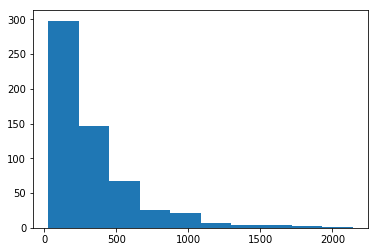

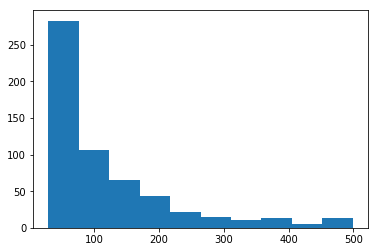

185529.88
67258.13
               recency  history_segment  history   mens  womens  zip_code  \
segment                                                                     
Mens E-Mail      21307            21307    21307  21307   21307     21307   
No E-Mail        21306            21306    21306  21306   21306     21306   
Womens E-Mail    21387            21387    21387  21387   21387     21387   

               newbie  channel  visit  conversion  spend  purchase_history  
segment                                                                     
Mens E-Mail     21307    21307  21307       21307  21307             21307  
No E-Mail       21306    21306  21306       21306  21306             21306  
Womens E-Mail   21387    21387  21387       21387  21387             21387  
         segment  recency   history  mens  womens  newbie  visit  conversion  \
0    Mens E-Mail     1347  86340.81   163     157     119    267         267   
1      No E-Mail      529  38725.18    73      69 

In [16]:
## Distribution of sales amount before and after campaign for converted customers
plt.hist(data[data["conversion"] == 1]["history"])
plt.show()

plt.hist(data[data["conversion"] == 1]["spend"])
plt.show()

print(data[data["conversion"] == 1]["history"].sum())
print(data[data["conversion"] == 1]["spend"].sum())

print(data.groupby("segment").count())
print(data[data["conversion"] == 1].groupby("segment").agg(np.sum).reset_index())

In [17]:
data.groupby(["visit","segment"]).count().reset_index()

,visit,segment,recency,history_segment,history,mens,womens,zip_code,newbie,channel,conversion,spend,purchase_history
0,0,Mens E-Mail,17413,17413,17413,17413,17413,17413,17413,17413,17413,17413,17413
1,0,No E-Mail,19044,19044,19044,19044,19044,19044,19044,19044,19044,19044,19044
2,0,Womens E-Mail,18149,18149,18149,18149,18149,18149,18149,18149,18149,18149,18149
3,1,Mens E-Mail,3894,3894,3894,3894,3894,3894,3894,3894,3894,3894,3894
4,1,No E-Mail,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262
5,1,Womens E-Mail,3238,3238,3238,3238,3238,3238,3238,3238,3238,3238,3238


In [18]:
print(data[data["visit"] == 1]["segment"].value_counts())
print(data[data["visit"] == 1]["segment"].value_counts(normalize = True) * 100)
print(data[data["visit"] == 0]["segment"].value_counts())
print(data[data["visit"] == 0]["segment"].value_counts(normalize = True) * 100)

Mens E-Mail      3894
Womens E-Mail    3238
No E-Mail        2262
Name: segment, dtype: int64
Mens E-Mail      41.451991
Womens E-Mail    34.468810
No E-Mail        24.079199
Name: segment, dtype: float64
No E-Mail        19044
Womens E-Mail    18149
Mens E-Mail      17413
Name: segment, dtype: int64
No E-Mail        34.875288
Womens E-Mail    33.236274
Mens E-Mail      31.888437
Name: segment, dtype: float64


In [19]:
## Conversion rate for each segment
## What is the probability of an individual converting in the control group?
prob_noemail = (data[data["segment"] == "No E-Mail"]["conversion"] == 1).mean()
print(prob_noemail)

## Given that an individual was in the mens email group, what is the probability they converted?
prob_mens = (data[data["segment"] == "Mens E-Mail"]["conversion"] == 1).mean()
print(prob_mens)


## Given that an individual was in the womens email group, what is the probability they converted?
prob_mens = (data[data["segment"] == "Womens E-Mail"]["conversion"] == 1).mean()
print(prob_mens)

0.005726086548390125
0.01253109306800582
0.008837144059475383


In [20]:
## visit rate for each segment
## What is the probability of an individual visited regardless of the email they receive?
print((data["visit"] == 1).mean())

## Given that an individual was in the no email group, what is the probability they visited?
prob_noemail = (data[data["segment"] == "No E-Mail"]["visit"] == 1).mean()
print(prob_noemail)

## Given that an individual was in the mens email group, what is the probability they visited?
prob_mens = (data[data["segment"] == "Mens E-Mail"]["visit"] == 1).mean()
print(prob_mens)


## Given that an individual was in the womens email group, what is the probability they visited?
prob_mens = (data[data["segment"] == "Womens E-Mail"]["visit"] == 1).mean()
print(prob_mens)

0.14678125
0.10616727682343002
0.18275684047496127
0.151400383410483


In [21]:
## How much incremental sales per customer did the no-email version of the e-mail campaign drive? 
noemail_segment_count = len(data[(data["segment"] == "No E-Mail")])
print(noemail_segment_count)
total_spend_noemail_historical = np.sum(data[(data["segment"] == "No E-Mail") & (data["conversion"] == 1)]["history"])
print(total_spend_noemail_historical)
noemail_hist_per_customer = total_spend_noemail_historical/noemail_segment_count
print("Average spending historically for each customer in control group:",noemail_hist_per_customer)

noemail_segment_count = len(data[(data["segment"] == "No E-Mail")])
print(noemail_segment_count)
total_spend_noemail_spend = np.sum(data[(data["segment"] == "No E-Mail") & (data["conversion"] == 1)]["spend"])
print(total_spend_noemail_spend)
noemail_spend_per_customer = total_spend_noemail_spend/noemail_segment_count
print("Average spending of customers in control group:",noemail_spend_per_customer)

21306
38725.18000000001
Average spending historically for each customer in control group: 1.8175715760818552
21306
13908.33
Average spending of customers in control group: 0.6527893551112363


In [22]:
## How much incremental sales per customer did the mens version of the e-mail campaign drive? 
mensemail_segment_count = len(data[(data["segment"] == "Mens E-Mail")])
print(mensemail_segment_count)
total_spend_mensemail_historical = np.sum(data[(data["segment"] == "Mens E-Mail") & (data["conversion"] == 1)]["history"])
print(total_spend_mensemail_historical)
mensemail_hist_per_customer = total_spend_mensemail_historical/mensemail_segment_count
print("Average spending historically for each customer in mens email group:",mensemail_hist_per_customer)

mensemail_segment_count = len(data[(data["segment"] == "Mens E-Mail")])
print(mensemail_segment_count)
total_spend_mensemail_spend = np.sum(data[(data["segment"] == "Mens E-Mail") & (data["conversion"] == 1)]["spend"])
print(total_spend_mensemail_spend)
mensemail_spend_per_customer = total_spend_mensemail_spend/mensemail_segment_count
print("Average spending of customers in mens email group:",mensemail_spend_per_customer)


21307
86340.81
Average spending historically for each customer in mens email group: 4.0522274369925375
21307
30311.690000000002
Average spending of customers in mens email group: 1.422616511005773


In [23]:
##How much incremental sales per customer did the Womens version of the e-mail campaign drive?
womensemail_segment_count = len(data[(data["segment"] == "Womens E-Mail")])
print(womensemail_segment_count)
total_spend_womensemail_historical = np.sum(data[(data["segment"] == "Womens E-Mail") & (data["conversion"] == 1)]["history"])
print(total_spend_womensemail_historical)
womensemail_hist_per_customer = total_spend_womensemail_historical/womensemail_segment_count
print("Average spending historically for each customer in womens email group:",womensemail_hist_per_customer)

womensemail_segment_count = len(data[(data["segment"] == "Womens E-Mail")])
print(womensemail_segment_count)
total_spend_womensemail_spend = np.sum(data[(data["segment"] == "Womens E-Mail") & (data["conversion"] == 1)]["spend"])
print(total_spend_womensemail_spend)
womensemail_spend_per_customer = total_spend_womensemail_spend/womensemail_segment_count
print("Average spending for customers in womens email group:",womensemail_spend_per_customer)

21387
60463.89
Average spending historically for each customer in womens email group: 2.827132837705148
21387
23038.11
Average spending for customers in womens email group: 1.0772015710478329


count    21306.000000
mean       240.882653
std        252.739362
min         29.990000
25%         65.300000
50%        156.655000
75%        325.167500
max       3345.930000
Name: history, dtype: float64
count    21307.000000
mean       242.835931
std        260.355685
min         29.990000
25%         63.580000
50%        157.220000
75%        325.215000
max       3215.970000
Name: history, dtype: float64
count    21387.000000
mean       242.536633
std        255.332880
min         29.990000
25%         65.040000
50%        160.090000
75%        326.820000
max       3040.200000
Name: history, dtype: float64


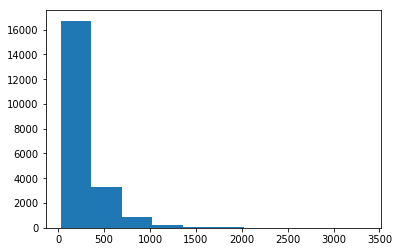

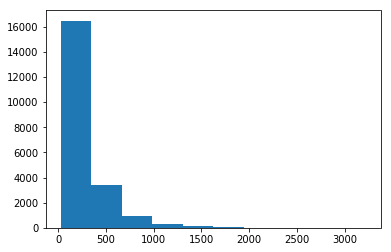

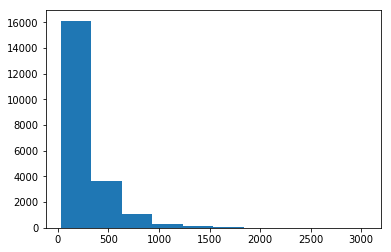

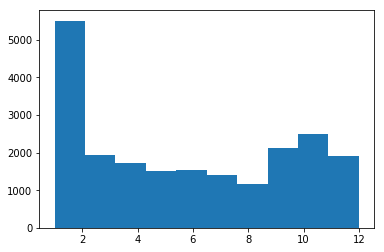

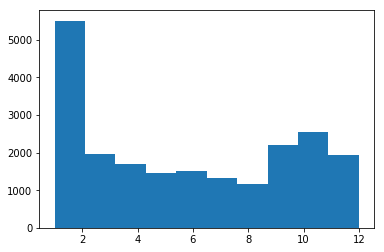

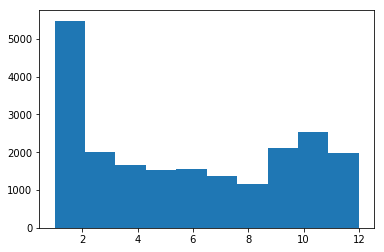

In [24]:
## Historical spend patterns for control and treatment groups
print(data[data["segment"] == "No E-Mail"]["history"].describe())
print(data[data["segment"] == "Mens E-Mail"]["history"].describe())
print(data[data["segment"] == "Womens E-Mail"]["history"].describe())

plt.hist(data[data["segment"] == "No E-Mail"]["history"])
plt.show()
plt.hist(data[data["segment"] == "Mens E-Mail"]["history"])
plt.show()
plt.hist(data[data["segment"] == "Womens E-Mail"]["history"])
plt.show()

plt.hist(data[data["segment"] == "No E-Mail"]["recency"])
plt.show()
plt.hist(data[data["segment"] == "Mens E-Mail"]["recency"])
plt.show()
plt.hist(data[data["segment"] == "Womens E-Mail"]["recency"])
plt.show()
## So historical spending of customers in each group follows the same distribution that means
## Customers are stratified sampled based on their historical spend patterns

## Statistical test of significance: Test for proportions for conversion rate

In [25]:
## Comparing control with mens email treatment and testing for significance for conversion rate
import statsmodels.api as sm

convert_noemail = (data.query('segment=="No E-Mail"')['conversion']==1).sum()
convert_mensemail = (data.query('segment=="Mens E-Mail"')['conversion']==1).sum()
n_noemail = (data['segment']=='No E-Mail').sum()
n_mensemail =(data['segment']=='Mens E-Mail').sum()

print((convert_noemail, convert_mensemail, n_noemail, n_mensemail))

z_score, p_value = sm.stats.proportions_ztest([convert_mensemail, convert_noemail], [n_mensemail, n_noemail], alternative='larger')
print((z_score, p_value))

(122, 267, 21306, 21307)
(7.385114410925771, 7.616117502977714e-14)


In [26]:
## Comparing control with womens email treatment and testing for significance for conversion rate
import statsmodels.api as sm

convert_noemail = (data.query('segment=="No E-Mail"')['conversion']==1).sum()
convert_womensemail = (data.query('segment=="Womens E-Mail"')['conversion']==1).sum()
n_noemail = (data['segment']=='No E-Mail').sum()
n_womensemail =(data['segment']=='Womens E-Mail').sum()

print((convert_noemail, convert_womensemail, n_noemail, n_womensemail))

z_score, p_value = sm.stats.proportions_ztest([convert_womensemail, convert_noemail], [n_womensemail, n_noemail], alternative='larger')
print((z_score, p_value))

(122, 189, 21306, 21387)
(3.77956095835785, 7.855256455334224e-05)


In [27]:
## Comparing mens with womens email treatment and testing for significance for conversion rate
import statsmodels.api as sm 

convert_mensemail = (data.query('segment=="Mens E-Mail"')['conversion']==1).sum()
convert_womensemail = (data.query('segment=="Womens E-Mail"')['conversion']==1).sum()
n_mensemail = (data['segment']=='Mens E-Mail').sum()
n_womensemail =(data['segment']=='Womens E-Mail').sum()

print((convert_mensemail, convert_womensemail, n_mensemail, n_womensemail))

z_score, p_value = sm.stats.proportions_ztest([convert_mensemail, convert_womensemail], [n_mensemail, n_womensemail], alternative='larger')
print((z_score, p_value))

(267, 189, 21307, 21387)
(3.7125842027552878, 0.0001025768873284419)


## Statistical test of significance: Test for proportions for visitor rate

In [28]:
## Comparing control with mens email treatment and testing for significance for visitor rate
import statsmodels.api as sm

visit_noemail = (data.query('segment=="No E-Mail"')['visit']==1).sum()
visit_mensemail = (data.query('segment=="Mens E-Mail"')['visit']==1).sum()
n_noemail = (data['segment']=='No E-Mail').sum()
n_mensemail =(data['segment']=='Mens E-Mail').sum()

print((visit_noemail, visit_mensemail, n_noemail, n_mensemail))

z_score, p_value = sm.stats.proportions_ztest([visit_mensemail, visit_noemail], [n_mensemail, n_noemail], alternative='larger')
print((z_score, p_value))

(2262, 3894, 21306, 21307)
(22.48604082719282, 2.8425827414011584e-112)


In [29]:
## Comparing control with womens email treatment and testing for significance for visitor rate
import statsmodels.api as sm

visit_noemail = (data.query('segment=="No E-Mail"')['visit']==1).sum()
visit_womensemail = (data.query('segment=="Womens E-Mail"')['visit']==1).sum()
n_noemail = (data['segment']=='No E-Mail').sum()
n_womensemail =(data['segment']=='Womens E-Mail').sum()

print((visit_noemail, visit_womensemail, n_noemail, n_womensemail))

z_score, p_value = sm.stats.proportions_ztest([visit_womensemail, visit_noemail], [n_womensemail, n_noemail], alternative='larger')
print((z_score, p_value))

(2262, 3238, 21306, 21387)
(13.949180655258505, 1.5912015796674607e-44)


In [30]:
## Comparing mens with womens email treatment and testing for significance for visitor rate
import statsmodels.api as sm 

visit_mensemail = (data.query('segment=="Mens E-Mail"')['visit']==1).sum()
visit_womensemail = (data.query('segment=="Womens E-Mail"')['visit']==1).sum()
n_mensemail = (data['segment']=='Mens E-Mail').sum()
n_womensemail =(data['segment']=='Womens E-Mail').sum()

print((visit_mensemail, visit_womensemail, n_mensemail, n_womensemail))

z_score, p_value = sm.stats.proportions_ztest([visit_mensemail, visit_womensemail], [n_mensemail, n_womensemail], alternative='larger')
print((z_score, p_value))

(3894, 3238, 21307, 21387)
(8.68455841563632, 1.9010826103183314e-18)


In [31]:
data['intercept']=1
data['segment_new']=pd.get_dummies(data['segment'])['Mens E-Mail']
data.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,purchase_history,intercept,segment_new
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,mens,1,0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,both,1,0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,womens,1,0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,mens,1,1
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,mens,1,0


In [32]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

lm=sm.Logit(data['conversion'], data[['intercept', 'segment_new']])
results=lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.051176
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                64000
Model:                          Logit   Df Residuals:                    63998
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2019   Pseudo R-squ.:                0.006311
Time:                        19:42:02   Log-Likelihood:                -3275.3
converged:                       True   LL-Null:                       -3296.1
                                        LLR p-value:                 1.118e-10
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -4.9147      0.057    -86.355      0.000      -5.026      -4.803
segment_new     0.5478      0.084      6.532      0.000       0.383       0.712
===============================================================================
"""

## Uplift Modeling for Mens E-Mail campaign

In [40]:
# split data into train and valid
data_mensemail = data[(data["segment"] == "Mens E-Mail")|(data["segment"] == "No E-Mail")].copy()
data_mensemail['treatment'] = np.where(data_mensemail['segment'] == "Mens E-Mail", 1, 0)

train, valid = sk.model_selection.train_test_split(data_mensemail, test_size=0.4,random_state=42)
print(data_mensemail.columns)
print(data_mensemail.head(10))

features = ['recency','mens','womens','treatment','history','newbie']
            
Y_train = train['visit']
X_train = train[features]

Y_valid = valid['visit']
X_valid = valid[features]

print(Y_train.value_counts())
print(Y_valid.value_counts())

Index(['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend',
       'purchase_history', 'intercept', 'segment_new', 'treatment'],
      dtype='object')
    recency   history_segment  history  mens  womens   zip_code  newbie  \
1         6    3) $200 - $350   329.08     1       1      Rural       1   
3         9    5) $500 - $750   675.83     1       0      Rural       1   
8         9    5) $500 - $750   675.07     1       1      Rural       1   
13        2    2) $100 - $200   101.64     0       1      Urban       0   
14        4    3) $200 - $350   241.42     0       1      Rural       1   
15        3      1) $0 - $100    58.13     1       0      Urban       1   
16        5      1) $0 - $100    29.99     1       0  Surburban       0   
17        9    2) $100 - $200   112.35     1       0      Rural       0   
18       11    3) $200 - $350   219.04     1       1  Surburban       0   
19        

In [41]:
data_mensemail = data[(data["segment"] == "Mens E-Mail")|(data["segment"] == "No E-Mail")].copy()
data_mensemail['treatment'] = np.where(data_mensemail['segment'] == "Mens E-Mail", 1, 0)

train, valid = sk.model_selection.train_test_split(data_mensemail, test_size=0.4,random_state=42)
print(data_mensemail.columns)
print(data_mensemail.head(10))

features = ['recency','mens','womens','treatment','history','newbie']
            
Y_train = train['visit']
X_train = train[features]

Y_valid = valid['visit']
X_valid = valid[features]

print(Y_train.value_counts())
print(Y_valid.value_counts())

Index(['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend',
       'purchase_history', 'intercept', 'segment_new', 'treatment'],
      dtype='object')
    recency   history_segment  history  mens  womens   zip_code  newbie  \
1         6    3) $200 - $350   329.08     1       1      Rural       1   
3         9    5) $500 - $750   675.83     1       0      Rural       1   
8         9    5) $500 - $750   675.07     1       1      Rural       1   
13        2    2) $100 - $200   101.64     0       1      Urban       0   
14        4    3) $200 - $350   241.42     0       1      Rural       1   
15        3      1) $0 - $100    58.13     1       0      Urban       1   
16        5      1) $0 - $100    29.99     1       0  Surburban       0   
17        9    2) $100 - $200   112.35     1       0      Rural       0   
18       11    3) $200 - $350   219.04     1       1  Surburban       0   
19        

In [42]:
# up sample with SMOTE
sm = SMOTE(random_state=42, ratio = 1.0)
X_train_upsamp, Y_train_upsamp = sm.fit_sample(X_train, Y_train)
    
X_train_upsamp = pd.DataFrame(X_train_upsamp, columns=features)

Y_train_upsamp = pd.Series(Y_train_upsamp)

C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
eval_set = [(X_train_upsamp, Y_train_upsamp), (X_valid, Y_valid)]
model = xgb.XGBClassifier(learning_rate = 0.1,\
                                  max_depth = 7,\
                                  min_child_weight = 5,\
                                  objective = 'binary:logistic',\
                                  seed = 42,\
                                  gamma = 0.1,\
                                  silent = True)
model.fit(X_train_upsamp, Y_train_upsamp, eval_set=eval_set,\
                    eval_metric="auc", verbose=True, early_stopping_rounds=30)

[0]	validation_0-auc:0.873157	validation_1-auc:0.62383
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.880292	validation_1-auc:0.627644
[2]	validation_0-auc:0.883262	validation_1-auc:0.62823
[3]	validation_0-auc:0.883602	validation_1-auc:0.628804
[4]	validation_0-auc:0.885808	validation_1-auc:0.628267
[5]	validation_0-auc:0.888538	validation_1-auc:0.6268
[6]	validation_0-auc:0.88924	validation_1-auc:0.627469
[7]	validation_0-auc:0.890105	validation_1-auc:0.627358
[8]	validation_0-auc:0.892253	validation_1-auc:0.627314
[9]	validation_0-auc:0.893463	validation_1-auc:0.626723
[10]	validation_0-auc:0.894557	validation_1-auc:0.626325
[11]	validation_0-auc:0.895262	validation_1-auc:0.627014
[12]	validation_0-auc:0.89664	validation_1-auc:0.627688
[13]	validation_0-auc:0.898177	validation_1-auc:0.627299
[14]	validation_0-auc:0.899641	validation_1-auc:0.627166
[15]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train_upsamp,Y_train_upsamp)

pred_train = clf.predict_proba(X_train_upsamp)
pred_test = clf.predict_proba(X_valid)

print(pred_train)
print(pred_test)

[[1.  0. ]
 [0.9 0.1]
 [0.4 0.6]
 ...
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]]
[[1.         0.        ]
 [0.6        0.4       ]
 [1.         0.        ]
 ...
 [0.82674286 0.17325714]
 [1.         0.        ]
 [0.9        0.1       ]]


In [45]:
## AUC calculations
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(Y_train_upsamp, pred_train[:,1])
print("Training AUC score:", auc_train)

auc_test = roc_auc_score(Y_valid, pred_test[:,1])
print("Testing AUC score:", auc_test)

Training AUC score: 0.994325164218559
Testing AUC score: 0.5450350901234555


C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


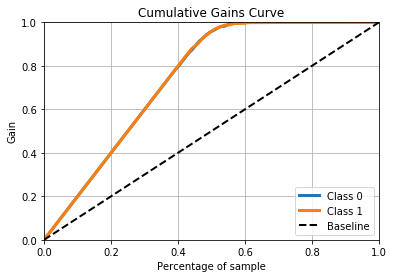

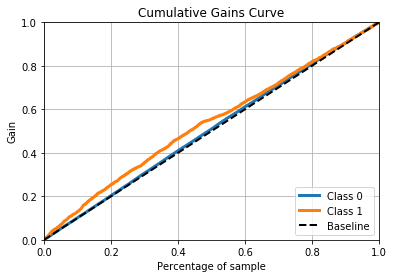

In [46]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(Y_train_upsamp, pred_train)
skplt.metrics.plot_cumulative_gain(Y_valid, pred_test)
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,Y_train_upsamp)
accuracy_test = accuracy_score(pred_test,Y_valid)

print(accuracy_train)
print(accuracy_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train_upsamp), clf.predict_proba(X_train_upsamp)[:,1])
auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(Y_valid), clf.predict_proba(X_valid)[:,1])
auc_test = metrics.auc(fpr,tpr)

print(auc_train)
print(auc_test)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [48]:
pd.crosstab(Y_train_upsamp,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

Exception: Data must be 1-dimensional

In [ ]:
##from bokeh.plotting import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
from sklearn import metrics
preds = clf.predict_proba(X_train_upsamp)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(Y_train_upsamp), preds)
auc = metrics.auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

In [ ]:
##from bokeh.plotting import Histogram
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
from sklearn import metrics
preds = clf.predict_proba(X_valid)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(Y_valid), preds)
auc = metrics.auc(fpr,tpr)
p = figure(title="ROC Curve - validation data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

## Uplift Modeling using Logistic Regression: Control vs Mens - Email treatment

In [ ]:
## First model building a Treatment model: Predict whether customer visits or not
from sklearn.linear_model import LogisticRegression

data_mensemail = data[(data["segment"] == "Mens E-Mail")|(data["segment"] == "No E-Mail")].copy()
data_mensemail['treatment'] = np.where(data_mensemail['segment'] == "Mens E-Mail", 1, 0)

features = ['recency','mens','womens','newbie','treatment','history_segment','zip_code']

# split data into train and valid
train, valid = sk.model_selection.train_test_split(data_mensemail, test_size=0.4,random_state=42)
# Generate validation data
# one for control group, another for treatment group
valid_control = valid[valid['segment']=='No E-Mail']
Y_valid_control = valid_control['visit']
X_valid_control = valid_control[features]

valid_exper = valid[valid['segment']=='Mens E-Mail']
Y_valid_exper = valid_exper['visit']
X_valid_exper = valid_exper[features]

print(len(valid_control))
print(len(valid_exper))

print(valid_control["visit"].value_counts())
print(valid_exper["visit"].value_counts())


print(valid_control["treatment"].value_counts())
print(valid_exper["treatment"].value_counts())

In [ ]:
train_control = train[train['segment']=='No E-Mail']
Y_train_control = train_control['visit']
X_train_control = train_control[features]

train_exper = train[train['segment']=='Mens E-Mail']
Y_train_exper = train_exper['visit']
X_train_exper = train_exper[features]

print(len(train_control))
print(len(train_exper))

print(train_control["visit"].value_counts())
print(train_exper["visit"].value_counts())


print(train_control["treatment"].value_counts())
print(train_exper["treatment"].value_counts())

In [ ]:
# up-sample training data with SMOTE
sm = SMOTE(random_state=42, ratio = 1.0)

# up-sample control group
X_train_control_upsamp, Y_train_control_upsamp = sm.fit_sample(X_train_control, Y_train_control)
X_train_control_upsamp = pd.DataFrame(X_train_control_upsamp, columns=features)
Y_train_control_upsamp = pd.Series(Y_train_control_upsamp)

print(Y_train_control_upsamp.value_counts())

# up-sample treatment group
X_train_exper_upsamp, Y_train_exper_upsamp = sm.fit_sample(X_train_exper, Y_train_exper)    
X_train_exper_upsamp = pd.DataFrame(X_train_exper_upsamp, columns=features)
Y_train_exper_upsamp = pd.Series(Y_train_exper_upsamp)

print(Y_train_exper_upsamp.value_counts())

In [ ]:
## Training the control model
model_control = LogisticRegression()
model_control.fit(X_train_control_upsamp, Y_train_control_upsamp)

## Training the treatment model
model_treatment = LogisticRegression()
model_treatment.fit(X_train_exper_upsamp, Y_train_exper_upsamp)

In [ ]:
## Predictions on validation data set for control and treatment groups
control_valid_pred = model_control.predict(X_valid_control)
exper_valid_pred = model_control.predict(X_valid_exper)

print(control_valid_pred)
print(exper_valid_pred)

In [ ]:
pred_probs_contol = model_control.predict_proba(X_valid_control)
pred_probs_exper = model_treatment.predict_proba(X_valid_control)

In [ ]:
## Lift Calculation
lift = pred_probs_exper[:,1] - pred_probs_contol[:,1]

In [ ]:
print(lift)
promotion = []
cutoff_probs = []
cutoff_lift = np.percentile(lift, 95)
print(cutoff_lift)

for prob in lift:
        if prob > 0:
            if prob > cutoff_lift:
                promotion.append('Yes')
                cutoff_probs.append(prob)
        else:
            promotion.append('No')

promotion = np.array(promotion)
print(len(promotion == 'Yes'))
print(len(promotion == 'No'))
print(cutoff_probs)

In [ ]:
plt.hist(lift)
plt.show()

In [ ]:
print(max(lift))

In [ ]:
print(min(lift))

In [ ]:
print(model_control.coef_)
print(model_treatment.coef_)

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(Y_valid_control, pred_probs_control)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_lift_curve(Y_valid_control, pred_probs_control)
plt.show()

## Uplift Modeling using Logistic Regression: Control vs Womens - Email treatment

In [54]:
## First model building a Treatment model: Predict whether customer visits or not
from sklearn.linear_model import LogisticRegression

data_womensemail = data[(data["segment"] == "Womens E-Mail")|(data["segment"] == "No E-Mail")].copy()
data_womensemail['treatment'] = np.where(data_womensemail['segment'] == "Womens E-Mail", 1, 0)
data_womensemail["history_segment2"] = pd.get_dummies(data_womensemail["history_segment"])["1) $0 - $100"]
data_womensemail["zip_code2"] = pd.get_dummies(data_womensemail["zip_code"])["Urban"]

features = ['recency','history','mens','womens','newbie','treatment','history_segment2','zip_code2']

# split data into train and valid
train, valid = sk.model_selection.train_test_split(data_womensemail, test_size=0.4,random_state=42)
# Generate validation data
# one for control group, another for treatment group
valid_control = valid[valid['segment']=='No E-Mail']
Y_valid_control = valid_control['visit']
X_valid_control = valid_control[features]

valid_exper = valid[valid['segment']=='Womens E-Mail']
Y_valid_exper = valid_exper['visit']
X_valid_exper = valid_exper[features]

print(len(valid_control))
print(len(valid_exper))

print(valid_control["visit"].value_counts())
print(valid_exper["visit"].value_counts())


print(valid_control["treatment"].value_counts())
print(valid_exper["treatment"].value_counts())

8454
8624
0    7562
1     892
Name: visit, dtype: int64
0    7301
1    1323
Name: visit, dtype: int64
0    8454
Name: treatment, dtype: int64
1    8624
Name: treatment, dtype: int64


In [55]:
train_control = train[train['segment']=='No E-Mail']
Y_train_control = train_control['visit']
X_train_control = train_control[features]

train_exper = train[train['segment']=='Womens E-Mail']
Y_train_exper = train_exper['visit']
X_train_exper = train_exper[features]

print(len(train_control))
print(len(train_exper))

print(train_control["visit"].value_counts())
print(train_exper["visit"].value_counts())


print(train_control["treatment"].value_counts())
print(train_exper["treatment"].value_counts())

from sklearn.cross_validation import train_test_split
X_treat_train, X_treat_test, y_treat_train, y_treat_test = train_test_split(X_train_exper, Y_train_exper, test_size = 0.4, stratify = Y_train_exper)
print(len(X_treat_train))
print(len(X_treat_test))
print(len(y_treat_train))
print(len(y_treat_test))
print((y_treat_train.value_counts()))
print((y_treat_test.value_counts()))


X_cont_train, X_cont_test, y_cont_train, y_cont_test = train_test_split(X_train_control, Y_train_control, test_size = 0.4, stratify = Y_train_control)
print(len(X_cont_train))
print(len(X_cont_test))
print(len(y_cont_train))
print(len(y_cont_test))
print((y_cont_train.value_counts()))
print((y_cont_test.value_counts()))

12852
12763
0    11482
1     1370
Name: visit, dtype: int64
0    10848
1     1915
Name: visit, dtype: int64
0    12852
Name: treatment, dtype: int64
1    12763
Name: treatment, dtype: int64
7657
5106
7657
5106
0    6508
1    1149
Name: visit, dtype: int64
0    4340
1     766
Name: visit, dtype: int64
7711
5141
7711
5141
0    6889
1     822
Name: visit, dtype: int64
0    4593
1     548
Name: visit, dtype: int64


## Modeling without upsampling

In [ ]:
# up-sample training data with SMOTE
sm = SMOTE(random_state=42, ratio = 1.0)

# up-sample control group
X_train_control_upsamp, Y_train_control_upsamp = sm.fit_sample(X_cont_train, y_cont_train)
X_train_control_upsamp = pd.DataFrame(X_train_control_upsamp, columns=features)
Y_train_control_upsamp = pd.Series(Y_train_control_upsamp)

print(Y_train_control_upsamp.value_counts())

# up-sample treatment group
X_train_exper_upsamp, Y_train_exper_upsamp = sm.fit_sample(X_treat_train, y_treat_train)    
X_train_exper_upsamp = pd.DataFrame(X_train_exper_upsamp, columns=features)
Y_train_exper_upsamp = pd.Series(Y_train_exper_upsamp)

print(Y_train_exper_upsamp.value_counts())

In [ ]:
## Training the treatment model without upsample
model_control = LogisticRegression()
model_control.fit(X_cont_train, y_cont_train)

## Training the treatment model without upsample
model_treatment = LogisticRegression()
model_treatment.fit(X_treat_train, y_treat_train)

In [ ]:
## Making predictions on the test datasets for treatment and control without upsampling
control_test_pred = model_control.predict_proba(X_cont_test)
treatment_test_pred = model_control.predict_proba(X_treat_test)

In [ ]:
## AUC calculations
from sklearn.metrics import roc_auc_score
auc_treatment = roc_auc_score(y_treat_test, treatment_test_pred[:,1])
print("Treatment AUC score:", auc_treatment)

auc_control = roc_auc_score(y_cont_test, control_test_pred[:,1])
print("Control AUC score:", auc_control)

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_treat_test, treatment_test_pred)
skplt.metrics.plot_cumulative_gain(y_cont_test, control_test_pred)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_lift_curve(y_treat_test, treatment_test_pred)
skplt.metrics.plot_lift_curve(y_cont_test, control_test_pred)
plt.show()

In [ ]:
## Training the control model
model_control = LogisticRegression()
model_control.fit(X_train_control_upsamp, Y_train_control_upsamp)

## Training the treatment model
model_treatment = LogisticRegression()
model_treatment.fit(X_train_exper_upsamp, Y_train_exper_upsamp)

In [ ]:
# up-sample training data with SMOTE
sm = SMOTE(random_state=42, ratio = 1.0)

# up-sample control group
X_train_control_upsamp, Y_train_control_upsamp = sm.fit_sample(X_train_control, Y_train_control)
X_train_control_upsamp = pd.DataFrame(X_train_control_upsamp, columns=features)
Y_train_control_upsamp = pd.Series(Y_train_control_upsamp)

print(Y_train_control_upsamp.value_counts())

# up-sample treatment group
X_train_exper_upsamp, Y_train_exper_upsamp = sm.fit_sample(X_train_exper, Y_train_exper)    
X_train_exper_upsamp = pd.DataFrame(X_train_exper_upsamp, columns=features)
Y_train_exper_upsamp = pd.Series(Y_train_exper_upsamp)

print(Y_train_exper_upsamp.value_counts())

In [ ]:
## Training the control model
model_control = LogisticRegression()
model_control.fit(X_train_control_upsamp, Y_train_control_upsamp)

## Training the treatment model
model_treatment = LogisticRegression()
model_treatment.fit(X_train_exper_upsamp, Y_train_exper_upsamp)

In [ ]:
## Predictions on validation data set for control and treatment groups
control_valid_pred = model_control.predict(X_valid_control)
exper_valid_pred = model_control.predict(X_valid_exper)

In [ ]:
pred_probs_control = model_control.predict_proba(X_valid_control)
pred_probs_exper = model_treatment.predict_proba(X_valid_control)

In [ ]:
## Lift Calculation
lift = pred_probs_exper[:,1] - pred_probs_control[:,1]
treatment_probs = pred_probs_exper[:,1]
control_probs = pred_probs_control[:,1]

prob_df = pd.DataFrame({'treatment':list(treatment_probs), 'control':list(control_probs), 'uplift':list(lift)})
prob_df.head(10)

In [ ]:
print(lift)
promotion = []
cutoff_probs = []
cutoff_lift = np.percentile(lift, 95)
print(cutoff_lift)

for prob in lift:
        if prob > 0:
            if prob > cutoff_lift:
                promotion.append('Yes')
                cutoff_probs.append(prob)
        else:
            promotion.append('No')

promotion = np.array(promotion)
print(len(promotion == 'Yes'))
print(len(promotion == 'No'))
print(cutoff_probs)

In [ ]:
plt.hist(lift)
plt.show()

In [ ]:
print(max(lift))
print(min(lift))

In [ ]:
## Lift Calculation
lift = pred_probs_exper[:,1] - pred_probs_control[:,1]
treatment_probs = pred_probs_exper[:,1]
control_probs = pred_probs_control[:,1]

prob_df = pd.DataFrame({'treatment':list(treatment_probs), 'control':list(control_probs), 'uplift':list(lift)})
prob_df.head(10)
prob_df['Decile_rank'] = pd.qcut(prob_df['uplift'],10,labels=False)
prob_df['cumulative_uplift'] = prob_df['uplift'].cumsum()
print(prob_df.head(10))

In [ ]:
plt.bar(prob_df['Decile_rank'],prob_df['uplift'])
plt.ylabel("uplift percentage")
plt.xlabel("deciles")
plt.title("Uplift percentage by deciles")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_lift_curve(Y_valid_control, pred_probs_control)
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(Y_valid_control, pred_probs_control)
plt.show()

In [51]:
train_control = train[train['segment']=='No E-Mail']
Y_train_control = train_control['visit']
X_train_control = train_control[features]

train_exper = train[train['segment']=='Mens E-Mail']
Y_train_exper = train_exper['visit']
X_train_exper = train_exper[features]

print(len(train_control))
print(len(train_exper))

print(train_control["visit"].value_counts())
print(train_exper["visit"].value_counts())


print(train_control["treatment"].value_counts())
print(train_exper["treatment"].value_counts())

from sklearn.cross_validation import train_test_split
X_treat_train, X_treat_test, y_treat_train, y_treat_test = train_test_split(X_train_exper, Y_train_exper, test_size = 0.2, stratify = Y_train_exper)
print(len(X_treat_train))
print(len(X_treat_test))
print(len(y_treat_train))
print(len(y_treat_test))
print((y_treat_train.value_counts()))
print((y_treat_test.value_counts()))


X_cont_train, X_cont_test, y_cont_train, y_cont_test = train_test_split(X_train_control, Y_train_control, test_size = 0.2, stratify = Y_train_control)
print(len(X_cont_train))
print(len(X_cont_test))
print(len(y_cont_train))
print(len(y_cont_test))
print((y_cont_train.value_counts()))
print((y_cont_test.value_counts()))

12772
12795
0    11444
1     1328
Name: visit, dtype: int64
0    10468
1     2327
Name: visit, dtype: int64
0    12772
Name: treatment, dtype: int64
1    12795
Name: treatment, dtype: int64
10236
2559
10236
2559
0    8374
1    1862
Name: visit, dtype: int64
0    2094
1     465
Name: visit, dtype: int64
10217
2555
10217
2555
0    9155
1    1062
Name: visit, dtype: int64
0    2289
1     266
Name: visit, dtype: int64


In [56]:
train_control = train[train['segment']=='No E-Mail']
Y_train_control = train_control['visit']
X_train_control = train_control[features]

train_exper = train[train['segment']=='Womens E-Mail']
Y_train_exper = train_exper['visit']
X_train_exper = train_exper[features]

print(len(train_control))
print(len(train_exper))

print(train_control["visit"].value_counts())
print(train_exper["visit"].value_counts())


print(train_control["treatment"].value_counts())
print(train_exper["treatment"].value_counts())

from sklearn.cross_validation import train_test_split
X_treat_train, X_treat_test, y_treat_train, y_treat_test = train_test_split(X_train_exper, Y_train_exper, test_size = 0.5, stratify = Y_train_exper)
print(len(X_treat_train))
print(len(X_treat_test))
print(len(y_treat_train))
print(len(y_treat_test))
print((y_treat_train.value_counts()))
print((y_treat_test.value_counts()))


X_cont_train, X_cont_test, y_cont_train, y_cont_test = train_test_split(X_train_control, Y_train_control, test_size = 0.5, stratify = Y_train_control)
print(len(X_cont_train))
print(len(X_cont_test))
print(len(y_cont_train))
print(len(y_cont_test))
print((y_cont_train.value_counts()))
print((y_cont_test.value_counts()))

12852
12763
0    11482
1     1370
Name: visit, dtype: int64
0    10848
1     1915
Name: visit, dtype: int64
0    12852
Name: treatment, dtype: int64
1    12763
Name: treatment, dtype: int64
6381
6382
6381
6382
0    5424
1     957
Name: visit, dtype: int64
0    5424
1     958
Name: visit, dtype: int64
6426
6426
6426
6426
0    5741
1     685
Name: visit, dtype: int64
0    5741
1     685
Name: visit, dtype: int64


In [ ]:
## Training the treatment model without upsample
model_control = LogisticRegression()
model_control.fit(X_cont_train, y_cont_train)

## Training the treatment model without upsample
model_treatment = LogisticRegression()
model_treatment.fit(X_treat_train, y_treat_train)

In [57]:
## XGBoost Model

## eval_set = [(X_train_upsamp, Y_train_upsamp), (X_valid, Y_valid)]
model_treat = xgb.XGBClassifier(learning_rate = 0.1,\
                                  max_depth = 7,\
                                  min_child_weight = 5,\
                                  objective = 'binary:logistic',\
                                  seed = 42,\
                                  gamma = 0.1,\
                                  silent = True)
model_treat.fit(X_treat_train, y_treat_train)

model_cont = xgb.XGBClassifier(learning_rate = 0.1,\
                                  max_depth = 7,\
                                  min_child_weight = 5,\
                                  objective = 'binary:logistic',\
                                  seed = 42,\
                                  gamma = 0.1,\
                                  silent = True)
model_cont.fit(X_cont_train, y_cont_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [58]:
## Making predictions on the test datasets for treatment and control without upsampling
control_test_pred = model_cont.predict_proba(X_cont_test)
treatment_test_pred = model_treat.predict_proba(X_treat_test)

In [59]:
## AUC calculations
from sklearn.metrics import roc_auc_score
auc_treatment = roc_auc_score(y_treat_test, treatment_test_pred[:,1])
print("Treatment AUC score:", auc_treatment)

auc_control = roc_auc_score(y_cont_test, control_test_pred[:,1])
print("Control AUC score:", auc_control)

Treatment AUC score: 0.5843039479680505
Control AUC score: 0.6160474598769003


C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


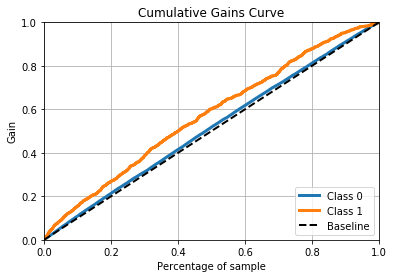

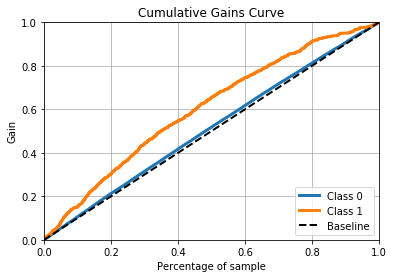

In [60]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_treat_test, treatment_test_pred)
skplt.metrics.plot_cumulative_gain(y_cont_test, control_test_pred)
plt.show()

C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


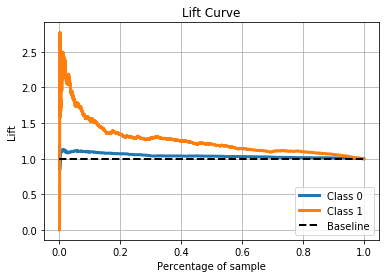

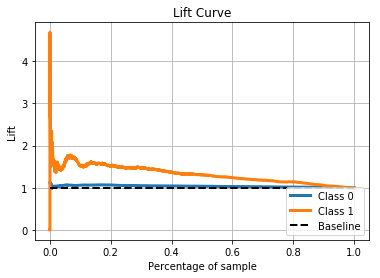

In [61]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_lift_curve(y_treat_test, treatment_test_pred)
skplt.metrics.plot_lift_curve(y_cont_test, control_test_pred)
plt.show()

In [49]:
data = pd.read_csv("Email_marketing_campaign.csv")
print(data.head(10))

   recency history_segment  history  mens  womens   zip_code  newbie channel  \
0       10  2) $100 - $200   142.44     1       0  Surburban       0   Phone   
1        6  3) $200 - $350   329.08     1       1      Rural       1     Web   
2        7  2) $100 - $200   180.65     0       1  Surburban       1     Web   
3        9  5) $500 - $750   675.83     1       0      Rural       1     Web   
4        2    1) $0 - $100    45.34     1       0      Urban       0     Web   
5        6  2) $100 - $200   134.83     0       1  Surburban       0   Phone   
6        9  3) $200 - $350   280.20     1       0  Surburban       1   Phone   
7        9    1) $0 - $100    46.42     0       1      Urban       0   Phone   
8        9  5) $500 - $750   675.07     1       1      Rural       1   Phone   
9       10    1) $0 - $100    32.84     0       1      Urban       1     Web   

         segment  visit  conversion  spend  
0  Womens E-Mail      0           0    0.0  
1      No E-Mail      0      

In [50]:
womens_data = data[data["segment"] == "Womens E-Mail"].copy()
print(womens_data["visit"].value_counts())

features = ['recency','history','mens','womens','newbie']

# split data into train and valid
train, test = sk.model_selection.train_test_split(womens_data, test_size=0.2,random_state=42)



# Generate validation data
# one for control group, another for treatment group

Y_test = test['visit']
X_test = test[features]

Y_train = train['visit']
X_train = train[features]

print(Y_train.value_counts())
print(Y_test.value_counts())

print(X_train.columns)
print(X_test.columns)

0    18149
1     3238
Name: visit, dtype: int64
0    14545
1     2564
Name: visit, dtype: int64
0    3604
1     674
Name: visit, dtype: int64
Index(['recency', 'history', 'mens', 'womens', 'newbie'], dtype='object')
Index(['recency', 'history', 'mens', 'womens', 'newbie'], dtype='object')


In [51]:
sm = SMOTE(random_state=42, ratio = 1.0)

# up-sample control group
X_train_upsamp, Y_train_upsamp = sm.fit_sample(X_train, Y_train)

X_train_upsamp = pd.DataFrame(X_train_upsamp, columns=features)
Y_train_upsamp = pd.Series(Y_train_upsamp)

C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [102]:
model_train = xgb.XGBClassifier(learning_rate = 0.1,\
                                  max_depth = 7,\
                                  min_child_weight = 5,\
                                  objective = 'binary:logistic',\
                                  seed = 42,\
                                  gamma = 0.1,\
                                  silent = True)
model_train.fit(X_train_upsamp, Y_train_upsamp)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [52]:
from sklearn.linear_model import LogisticRegression
model_train_log = LogisticRegression()
model_train_log.fit(X_train_upsamp, Y_train_upsamp)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
print(X_train_upsamp.columns)

Index(['recency', 'history', 'mens', 'womens', 'newbie'], dtype='object')


In [54]:
## Making predictions on the test datasets for training and testing without upsampling
train_pred = model_train_log.predict_proba(X_train_upsamp)
test_pred = model_train_log.predict_proba(X_test)

In [64]:
coef = model_train_log.coef_
print(coef)

for p,c in zip(features, coef[0]):
    print(p,c)

[[-5.21160762e-02  4.06947229e-04  5.38865637e-01  1.11664235e+00
  -5.88331390e-01]]
recency -0.052116076167192424
history 0.0004069472292488056
mens 0.5388656367310808
womens 1.1166423549197606
newbie -0.5883313897915453


In [55]:
## AUC calculations
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(Y_train_upsamp, train_pred[:,1])
print("Training AUC score:", auc_train)

auc_test = roc_auc_score(Y_test, test_pred[:,1])
print("Testing AUC score:", auc_test)

Training AUC score: 0.6398195309278905
Testing AUC score: 0.6267644424098513


C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


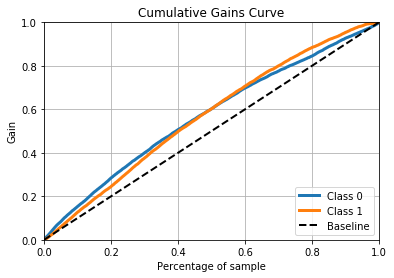

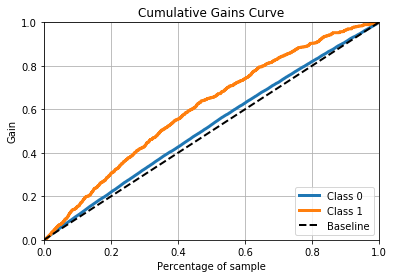

In [60]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(Y_train_upsamp, train_pred)
skplt.metrics.plot_cumulative_gain(Y_test, test_pred)
plt.show()

C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\kalya\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


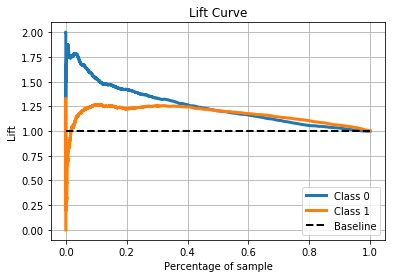

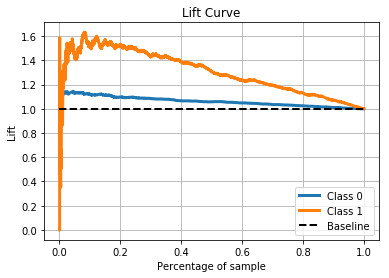

In [57]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_lift_curve(Y_train_upsamp, train_pred)
skplt.metrics.plot_lift_curve(Y_test, test_pred)
plt.show()

## Uplift Modeling for Spend: Womens Promotion

In [110]:
womens_data = data[data["segment"] == "Womens E-Mail"].copy()
print(womens_data["visit"].value_counts())

features = ['recency','history','mens','womens','newbie']

# split data into train and valid
train, test = sk.model_selection.train_test_split(womens_data, test_size=0.2,random_state=42)



# Generate validation data
# one for control group, another for treatment group

Y_test = test['spend']
X_test = test[features]

Y_train = train['spend']
X_train = train[features]

print(Y_train.value_counts())
print(Y_test.value_counts())

print(X_train.columns)
print(X_test.columns)

0    18149
1     3238
Name: visit, dtype: int64
0.00      16953
29.99        35
499.00        4
168.98        1
52.67         1
149.91        1
189.30        1
33.45         1
195.99        1
109.64        1
31.03         1
47.70         1
42.66         1
267.17        1
156.58        1
43.70         1
69.25         1
110.13        1
273.80        1
173.02        1
64.93         1
33.02         1
55.02         1
189.79        1
50.68         1
242.28        1
144.30        1
104.22        1
58.39         1
264.66        1
          ...  
88.00         1
100.45        1
138.92        1
37.27         1
126.96        1
275.73        1
59.32         1
113.44        1
88.56         1
37.42         1
123.68        1
60.78         1
146.33        1
231.94        1
103.93        1
137.87        1
159.99        1
184.30        1
163.79        1
94.50         1
41.18         1
126.66        1
39.81         1
34.05         1
87.53         1
309.08        1
172.53        1
153.91        1
83.26   

In [113]:
model_train = xgb.XGBClassifier(learning_rate = 0.1,\
                                  max_depth = 7,\
                                  min_child_weight = 5,\
                                  seed = 42,\
                                  gamma = 0.1,\
                                  silent = True)
model_train.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [115]:
## Making predictions on the test datasets for training and testing without upsampling
train_pred = model_train.predict_proba(X_train)
test_pred = model_train.predict_proba(X_test)

In [120]:
print(train_pred)
print(test_pred)

[[9.84724522e-01 1.30761135e-03 1.14867784e-04 ... 1.14867784e-04
  1.14867784e-04 5.29174693e-04]
 [9.96333361e-01 8.15682171e-04 2.38928496e-05 ... 2.38928496e-05
  2.38928496e-05 5.56432606e-05]
 [9.88365412e-01 3.96499439e-04 9.41821199e-05 ... 9.41821199e-05
  9.41821199e-05 2.19523849e-04]
 ...
 [9.94565606e-01 2.59084802e-04 4.33522073e-05 ... 4.33522073e-05
  4.33521636e-05 1.03394283e-04]
 [9.85074878e-01 4.06054407e-03 9.07033973e-05 ... 9.07033973e-05
  9.07033973e-05 2.52929633e-04]
 [9.95478570e-01 2.35996180e-04 3.58979742e-05 ... 3.58979742e-05
  3.58979378e-05 8.56160623e-05]]
[[9.93842602e-01 1.96885271e-03 3.51019444e-05 ... 3.51019444e-05
  3.51019444e-05 8.18171611e-05]
 [9.96753037e-01 1.17955125e-04 2.60937159e-05 ... 2.60937159e-05
  2.60937159e-05 7.62473792e-05]
 [9.94770706e-01 9.59194382e-04 3.58019752e-05 ... 3.58019752e-05
  3.58019388e-05 8.14853411e-05]
 ...
 [9.91645038e-01 1.79233332e-03 5.50240693e-05 ... 5.50240693e-05
  5.50240147e-05 1.25234859e-04]